In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score
import numpy as np 
pd.set_option('display.max_rows',200)

In [2]:
# Load the dataset
data = pd.read_csv('advisory.csv')

In [3]:
# Display the first few rows of the dataset and its summary information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  200 non-null    int64  
 1   Label               200 non-null    object 
 2   Age                 200 non-null    float64
 3   Income              200 non-null    float64
 4   Job Type            200 non-null    object 
 5   Tax Classification  200 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 9.5+ KB


In [4]:
data.head()

,ID,Label,Age,Income,Job Type,Tax Classification
0,1,Unknown,39.0,512000.0,Chief Officier,Low
1,2,Advisory,24.0,295000.0,VP,High
2,3,Unknown,36.0,445000.0,Chief Officier,High
3,4,Unknown,50.0,565000.0,Chief Officier,Medium
4,5,Unknown,19.0,327000.0,Owner,Low


In [5]:
data.isnull().sum()

ID                    0
Label                 0
Age                   0
Income                0
Job Type              0
Tax Classification    0
dtype: int64

In [6]:
data['Job Type'].value_counts()

Job Type
Chief Officier    88
Owner             62
VP                50
Name: count, dtype: int64

In [7]:
# Correcting typo in 'Job Type'
data['Job Type'] = data['Job Type'].str.replace('Chief Officier', 'Chief Officer')

In [8]:
data['Tax Classification'].value_counts()

Tax Classification
High      72
Low       64
Medium    64
Name: count, dtype: int64

In [9]:
# Calculating descriptive statistics for each variable
descriptive_stats = data.describe(include='all')

In [10]:
descriptive_stats

,ID,Label,Age,Income,Job Type,Tax Classification
count,200.000000,200,200.000000,200.00000,200,200
unique,NaN,2,NaN,NaN,3,3
top,NaN,Unknown,NaN,NaN,Chief Officer,High
freq,NaN,180,NaN,NaN,88,72
mean,100.500000,NaN,42.480000,517795.00000,NaN,NaN
std,57.879185,NaN,14.111886,144437.61316,NaN,NaN
min,1.000000,NaN,18.000000,203000.00000,NaN,NaN
25%,50.750000,NaN,30.500000,402250.00000,NaN,NaN
50%,100.500000,NaN,43.000000,521500.00000,NaN,NaN
75%,150.250000,NaN,55.000000,635250.00000,NaN,NaN


## Distributions 

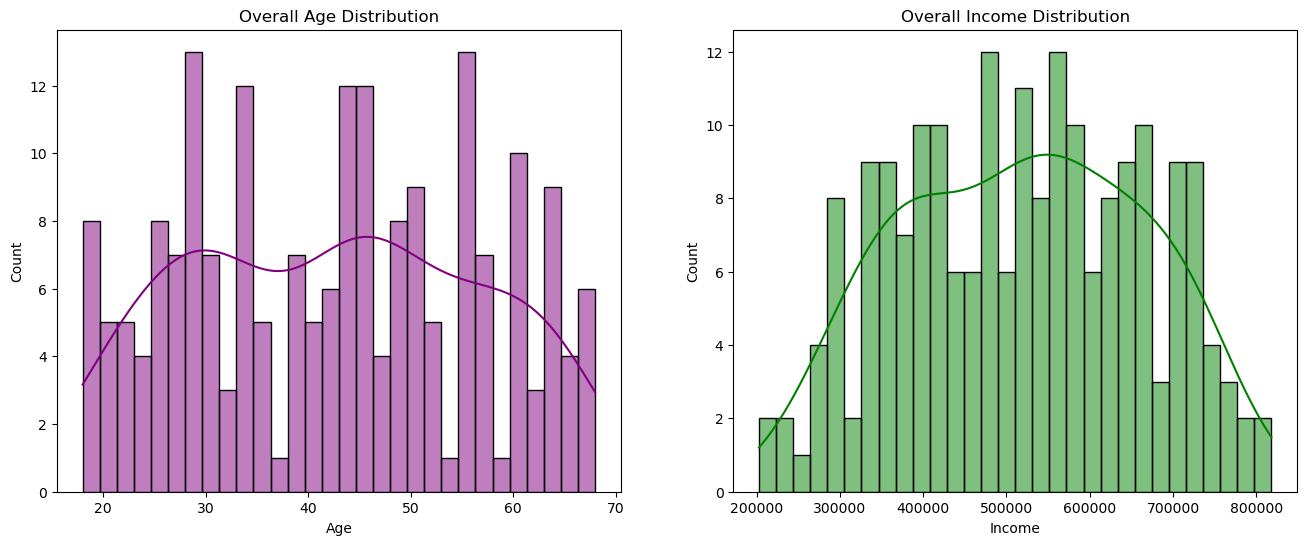

In [11]:
# Plotting distributions for 'Age' and 'Income'
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(data=data, x='Age', kde=True, ax=ax[0], bins=30, color='purple')
ax[0].set_title('Overall Age Distribution')
sns.histplot(data=data, x='Income', kde=True, ax=ax[1], bins=30, color='green')
ax[1].set_title('Overall Income Distribution')

plt.show()

/var/folders/_2/dhy8vxln0c738zl599fgyp7h0000gn/T/ipykernel_3526/1296428695.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Job Type', data=data, ax=ax[0], palette='Pastel2')
/var/folders/_2/dhy8vxln0c738zl599fgyp7h0000gn/T/ipykernel_3526/1296428695.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Tax Classification', data=data, ax=ax[1], palette='Pastel2')


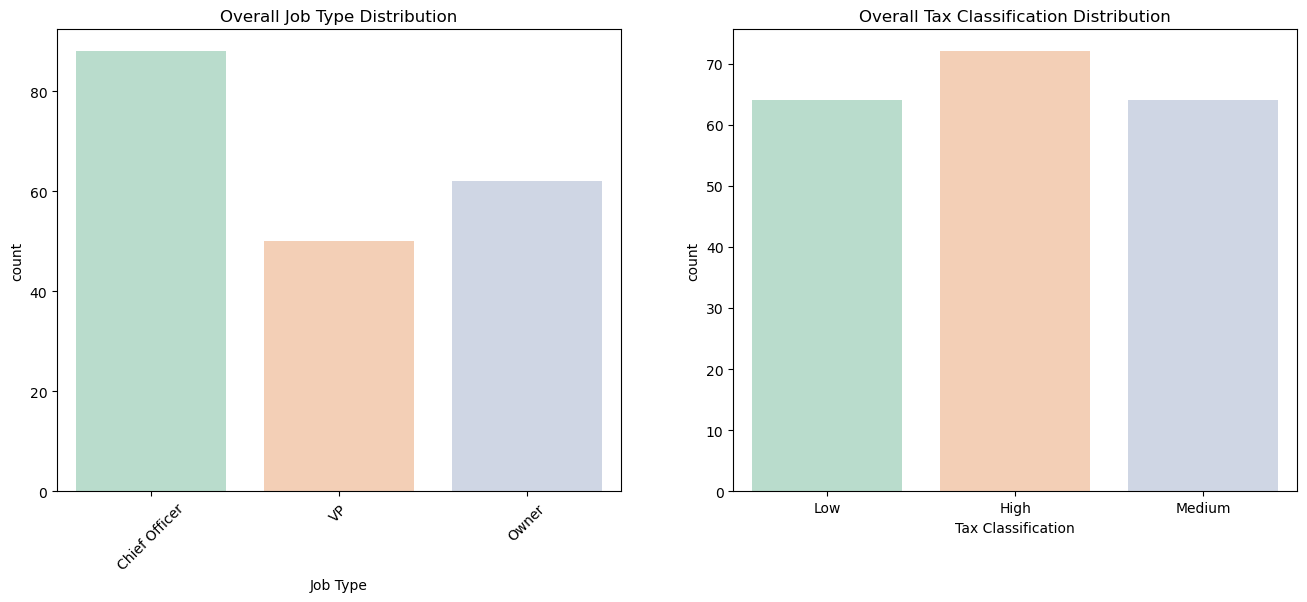

In [12]:
# Plotting count plots for 'Job Type' and 'Tax Classification'
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot(x='Job Type', data=data, ax=ax[0], palette='Pastel2')
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_title('Overall Job Type Distribution')
sns.countplot(x='Tax Classification', data=data, ax=ax[1], palette='Pastel2')
ax[1].set_title('Overall Tax Classification Distribution')

plt.show()

### Distributions by Label

In [13]:
# Filter the data by 'Label' for separate visualizations
data_advisory = data[data['Label'] == 'Advisory']
data_unknown = data[data['Label'] == 'Unknown']

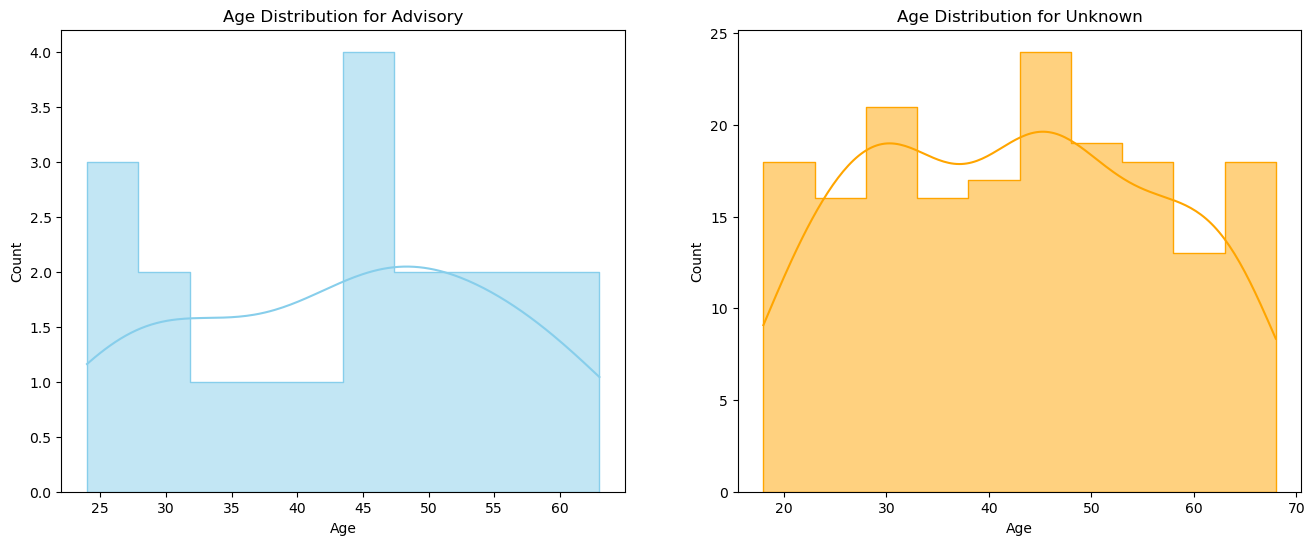

In [14]:
# Plotting distributions for 'Age' for 'Advisory' vs 'Unknown'
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(data=data_advisory, x='Age', kde=True, ax=ax[0], bins=10, color='skyblue', element='step')
ax[0].set_title('Age Distribution for Advisory')
sns.histplot(data=data_unknown, x='Age', kde=True, ax=ax[1], bins=10, color='orange', element='step')
ax[1].set_title('Age Distribution for Unknown')

plt.show()

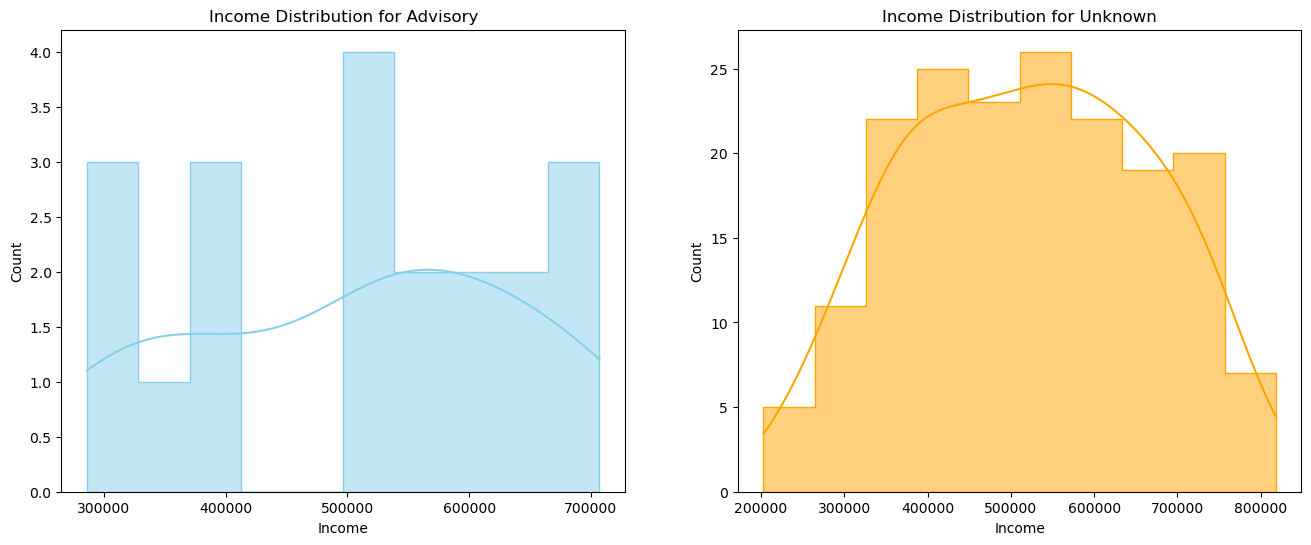

In [15]:
# Plotting distributions for 'Income' for 'Advisory' vs 'Unknown'
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(data=data_advisory, x='Income', kde=True, ax=ax[0], bins=10, color='skyblue', element='step')
ax[0].set_title('Income Distribution for Advisory')
sns.histplot(data=data_unknown, x='Income', kde=True, ax=ax[1], bins=10, color='orange', element='step')
ax[1].set_title('Income Distribution for Unknown')

plt.show()

In [16]:
# Defining the order for 'Job Type' and 'Tax Classification' for consistent visualization
job_type_order = ['VP', 'Chief Officer', 'Owner']
tax_classification_order = ['Low', 'Medium', 'High']

/var/folders/_2/dhy8vxln0c738zl599fgyp7h0000gn/T/ipykernel_3526/1186547278.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Job Type', data=data_advisory, ax=ax[0], palette='Blues', order=job_type_order)
/var/folders/_2/dhy8vxln0c738zl599fgyp7h0000gn/T/ipykernel_3526/1186547278.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Job Type', data=data_unknown, ax=ax[1], palette='Oranges', order=job_type_order)


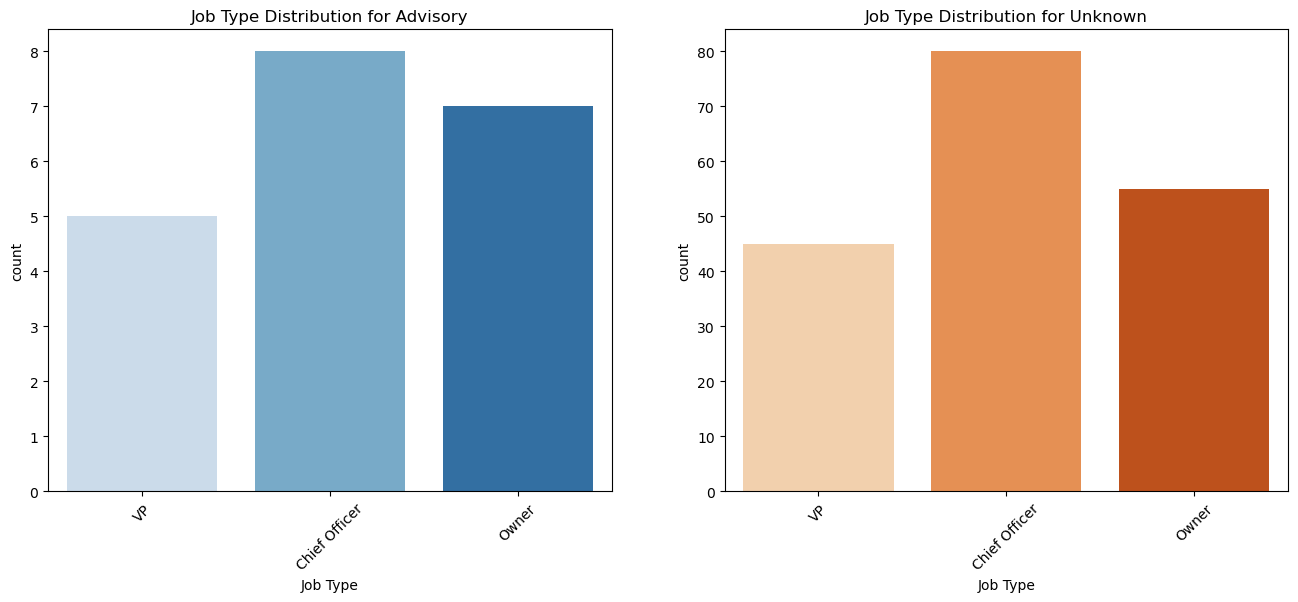

In [17]:
# Plotting count plots for 'Job Type' for 'Advisory' vs 'Unknown' with consistent ordering
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot(x='Job Type', data=data_advisory, ax=ax[0], palette='Blues', order=job_type_order)
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_title('Job Type Distribution for Advisory')
sns.countplot(x='Job Type', data=data_unknown, ax=ax[1], palette='Oranges', order=job_type_order)
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_title('Job Type Distribution for Unknown')

plt.show()

/var/folders/_2/dhy8vxln0c738zl599fgyp7h0000gn/T/ipykernel_3526/3361674388.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Tax Classification', data=data_advisory, ax=ax[0], palette='Blues', order=tax_classification_order)
/var/folders/_2/dhy8vxln0c738zl599fgyp7h0000gn/T/ipykernel_3526/3361674388.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Tax Classification', data=data_unknown, ax=ax[1], palette='Oranges', order=tax_classification_order)


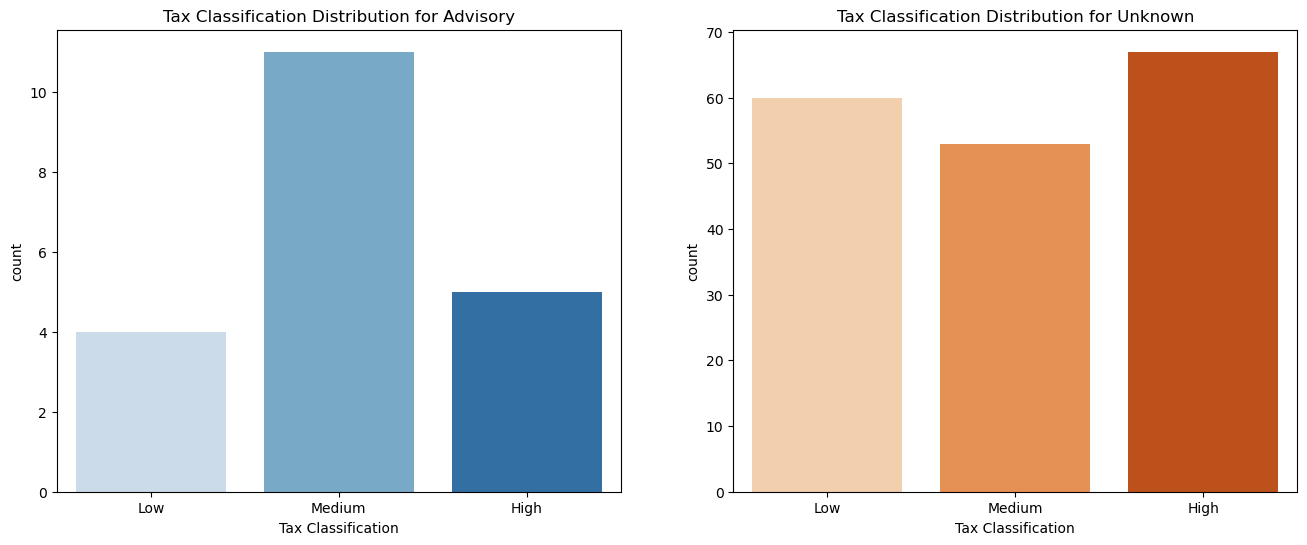

In [18]:
# Plotting count plots for 'Tax Classification' for 'Advisory' vs 'Unknown' with consistent ordering
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot(x='Tax Classification', data=data_advisory, ax=ax[0], palette='Blues', order=tax_classification_order)
ax[0].set_title('Tax Classification Distribution for Advisory')
sns.countplot(x='Tax Classification', data=data_unknown, ax=ax[1], palette='Oranges', order=tax_classification_order)
ax[1].set_title('Tax Classification Distribution for Unknown')

plt.show()

In [19]:
# creating dummy variables from 'Job Type' and 'Tax Classification'
dummies = pd.get_dummies(data[['Job Type', 'Tax Classification']], drop_first=False)
data = pd.concat([data, dummies], axis=1)

## Modeling 

## Approach 1: Fitting Multiple One-Class Classification Models.
1. One cluster Kmeans Model: defining the Advisory group as the single cluster and calculating the distance to that cluster for each person in the data.
2. Isolation Forest: Training model on Advisory group and predicting the entire dataset.
3. One Class SVM: Similarly trains on Advisory group. 
4. Combining the previous approaches and fitting Ensembled Isolation Forest: this approach combines the previous 3 approaches. 

### One Cluster KMeans model

In [20]:
features = ['Age', 'Income', 'Job Type_Chief Officer', 'Job Type_Owner',
            'Job Type_VP', 'Tax Classification_High', 'Tax Classification_Low',
            'Tax Classification_Medium']


X = data[features]

In [21]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# Fitting KMeans to the 'Advisory' class only
advisory_indices = data[data['Label'] == 'Advisory'].index
kmeans = KMeans(n_clusters=1, random_state=42)
kmeans.fit(X_scaled[advisory_indices])

KMeans(n_clusters=1, random_state=42)

In [23]:
# Predicting the closest cluster for the entire dataset
predictions = kmeans.predict(X_scaled)

In [24]:
# Calculating the distances of each point to the cluster center
data['kmeans_distances'] = kmeans.transform(X_scaled).flatten()

In [25]:
# Setting a threshold for being similar to the 'Advisory' cluster - using the median distance of 'Advisory' instances
threshold_distance = np.median(data['kmeans_distances'][advisory_indices])

In [26]:
# Flagging instances closer to the cluster center than the threshold as potential 'Advisory'
data['Close_To_Advisory_Cluster'] = data['kmeans_distances'] < threshold_distance

In [27]:
# Summarizing the potential 'Advisory' instances among the 'Unknown' labels based on distance
potential_advisory_by_distance_summary = data[data['Label'] == 'Unknown']['Close_To_Advisory_Cluster'].value_counts()

In [28]:
print('initial threshold: ', threshold_distance)
print('potential_advisory_by_distance_summary:')
print(potential_advisory_by_distance_summary)

initial threshold:  2.672515201359966
potential_advisory_by_distance_summary:
Close_To_Advisory_Cluster
False    119
True      61
Name: count, dtype: int64


In [29]:
# Exploring different thresholds to optimize the F1 score
thresholds = np.linspace(data['kmeans_distances'].min(), data['kmeans_distances'].max(), 100)
f1_scores = []
num_advisory_selected = []

for thresh in thresholds:
    predicted_advisory = data['kmeans_distances'] < thresh
    f1_scores.append(f1_score(data['Label'] == 'Advisory', predicted_advisory))
    num_advisory_selected.append(((data['Label'] == 'Advisory') & predicted_advisory).sum())

# Finding the threshold with the highest F1 score
max_f1_index = np.argmax(f1_scores)
best_threshold_f1 = thresholds[max_f1_index]
best_f1 = f1_scores[max_f1_index]

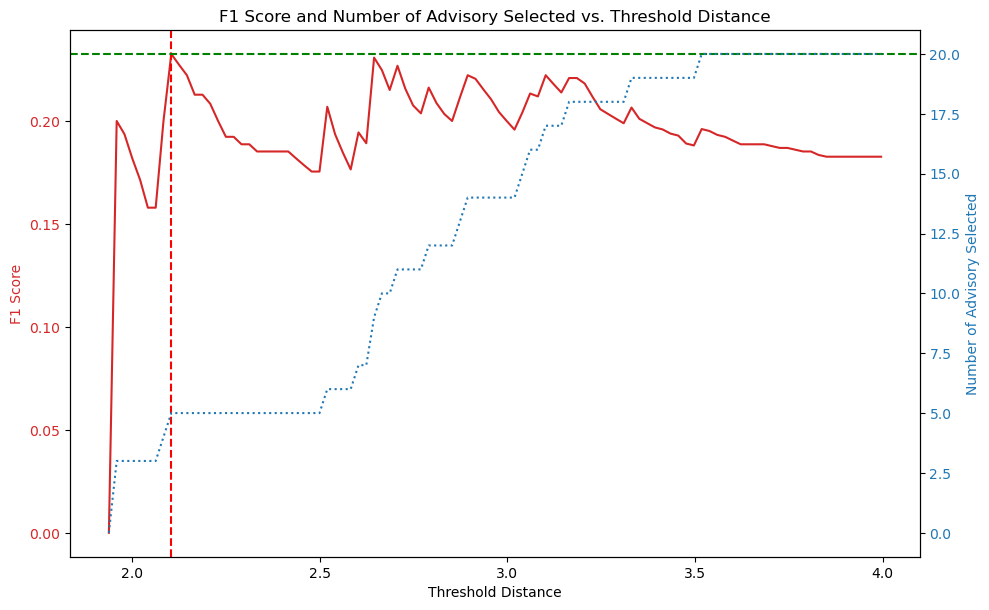

In [30]:
# Visualizing F1 score and the number of 'Advisory' instances selected vs. threshold distance
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Threshold Distance')
ax1.set_ylabel('F1 Score', color=color)
ax1.plot(thresholds, f1_scores, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.axvline(x=best_threshold_f1, color='r', linestyle='--', label="Best Threshold")
ax1.axhline(y=best_f1, color='g', linestyle='--', label="Best F1 Score")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Number of Advisory Selected', color=color)
ax2.plot(thresholds, num_advisory_selected, color=color, linestyle=':')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('F1 Score and Number of Advisory Selected vs. Threshold Distance')
plt.show()

In [31]:
print(best_threshold_f1, best_f1)
data['Kmeans_Advisory'] = data['kmeans_distances'] < best_threshold_f1
data['Kmeans_Advisory'].value_counts()

2.1040464938401553 0.23255813953488372


Kmeans_Advisory
False    177
True      23
Name: count, dtype: int64

In [32]:
# it is best to use the second best f1 score here since it has a simiar f1 score and captures more advisory individuals.
data['Kmeans_Advisory'] = data['kmeans_distances'] <= 2.65
data['Kmeans_Advisory'].value_counts()

Kmeans_Advisory
False    138
True      62
Name: count, dtype: int64

### Isolation Fores Model

In [34]:
features = ['Age', 'Income', 'Job Type_Chief Officer', 'Job Type_Owner',
            'Job Type_VP', 'Tax Classification_High', 'Tax Classification_Low',
            'Tax Classification_Medium']

X = data[features]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
# Fitting KMeans to the 'Advisory' class only
advisory_indices = data[data['Label'] == 'Advisory'].index

In [36]:
# Training the Isolation Forest model on 'Advisory' labeled rows
iso_forest_model = IsolationForest(n_estimators=100, random_state=42, contamination='auto')
iso_forest_model.fit(X_scaled[advisory_indices])

IsolationForest(random_state=42)

In [37]:
# Scoring the entire dataset
data['Anomaly_Score'] = iso_forest_model.decision_function(X_scaled)

In [38]:
# Setting a threshold for being similar to the 'Advisory' cluster - using the median distance of 'Advisory' instances
threshold_distance = np.median(data['Anomaly_Score'][advisory_indices])

In [39]:
# Flagging instances closer to the cluster center than the threshold as potential 'Advisory'
data['Closer_To_Advisory_Normality'] = data['Anomaly_Score'] > threshold_distance

In [40]:
# Summarizing the potential 'Advisory' instances among the 'Unknown' labels based on distance
potential_advisory_by_distance_summary = data[data['Label'] == 'Unknown']['Closer_To_Advisory_Normality'].value_counts()
print('initial threshold: ', threshold_distance)
print('potential_advisory_by_distance_summary:')
print(potential_advisory_by_distance_summary)

initial threshold:  -0.03240327848564217
potential_advisory_by_distance_summary:
Closer_To_Advisory_Normality
False    145
True      35
Name: count, dtype: int64


In [41]:
# Calculating the F1 score for the initial threshold
initial_f1_score = f1_score(data['Label'] == 'Advisory', data['Closer_To_Advisory_Normality'])

In [42]:
# Exploring different thresholds to optimize the F1 score
thresholds = np.linspace(data['Anomaly_Score'].min(), data['Anomaly_Score'].max(), 100)
f1_scores = []
num_advisory_selected = []

for thresh in thresholds:
    predicted_advisory = data['Anomaly_Score'] > thresh
    f1_scores.append(f1_score(data['Label'] == 'Advisory', predicted_advisory))
    num_advisory_selected.append(((data['Label'] == 'Advisory') & predicted_advisory).sum())

In [43]:
# Finding the threshold with the highest F1 score
max_f1_index = np.argmax(f1_scores)
best_threshold_f1 = thresholds[max_f1_index]
best_f1 = f1_scores[max_f1_index]

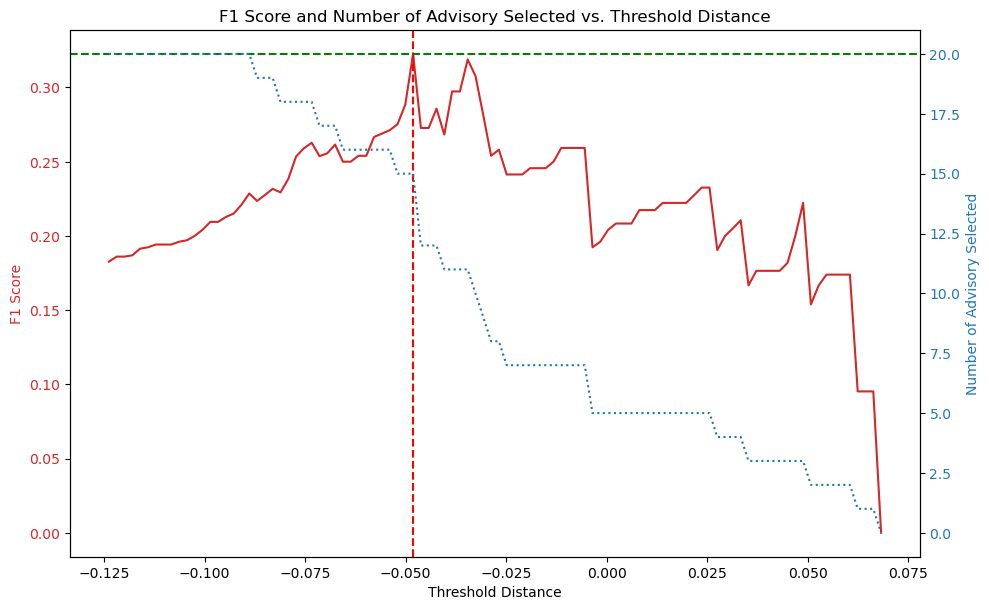

In [44]:
# Visualizing F1 score and the number of 'Advisory' instances selected vs. threshold distance
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Threshold Distance')
ax1.set_ylabel('F1 Score', color=color)
ax1.plot(thresholds, f1_scores, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.axvline(x=best_threshold_f1, color='r', linestyle='--', label="Best Threshold")
ax1.axhline(y=best_f1, color='g', linestyle='--', label="Best F1 Score")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Number of Advisory Selected', color=color)
ax2.plot(thresholds, num_advisory_selected, color=color, linestyle=':')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('F1 Score and Number of Advisory Selected vs. Threshold Distance')
plt.show()

In [45]:
best_threshold_f1, best_f1
print('best_threshold_f1: ', best_threshold_f1)
data['Isolation_Forest_Advisory'] = data['Anomaly_Score'] > best_threshold_f1
data['Isolation_Forest_Advisory'].value_counts()

best_threshold_f1:  -0.048141082411980035


Isolation_Forest_Advisory
False    127
True      73
Name: count, dtype: int64

### One Class SVM

In [46]:
features = ['Age', 'Income', 'Job Type_Chief Officer', 'Job Type_Owner',
            'Job Type_VP', 'Tax Classification_High', 'Tax Classification_Low',
            'Tax Classification_Medium']


X = data[features]

In [47]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
oc_svm = OneClassSVM(kernel='rbf', gamma='auto').fit(X_scaled[advisory_indices])

# Predicting: 1 for inliers (similar to Advisory), -1 for outliers
data['svm_predictions'] = oc_svm.predict(X_scaled)

In [49]:
# Getting the signed distance to the separating hyperplane
data['svm_decision_functions'] = oc_svm.decision_function(X_scaled)

In [50]:
# Setting a threshold for being similar to the 'Advisory' cluster - using the median distance of 'Advisory' instances
threshold_distance = np.median(data['svm_decision_functions'][advisory_indices])

In [51]:
# Flagging instances closer to the cluster center than the threshold as potential 'Advisory'
data['Close_To_SVM_Cutoff'] = data['svm_decision_functions'] > threshold_distance

In [52]:
# Summarizing the potential 'Advisory' instances among the 'Unknown' labels based on distance
potential_advisory_by_distance_summary = data[data['Label'] == 'Unknown']['Close_To_Advisory_Cluster'].value_counts()

print('initial threshold: ', threshold_distance)
print('potential_advisory_by_distance_summary:')
print(potential_advisory_by_distance_summary)

initial threshold:  3.896346584997268e-05
potential_advisory_by_distance_summary:
Close_To_Advisory_Cluster
False    119
True      61
Name: count, dtype: int64


In [53]:
# Exploring different thresholds to optimize the F1 score
thresholds = np.linspace(data['svm_decision_functions'].min(), data['svm_decision_functions'].max(), 100)
f1_scores = []
num_advisory_selected = []

for thresh in thresholds:
    predicted_advisory = data['svm_decision_functions'] > thresh
    f1_scores.append(f1_score(data['Label'] == 'Advisory', predicted_advisory))
    num_advisory_selected.append(((data['Label'] == 'Advisory') & predicted_advisory).sum())

In [54]:
# Finding the threshold with the highest F1 score
max_f1_index = np.argmax(f1_scores)
best_threshold_f1 = thresholds[max_f1_index]
best_f1 = f1_scores[max_f1_index]

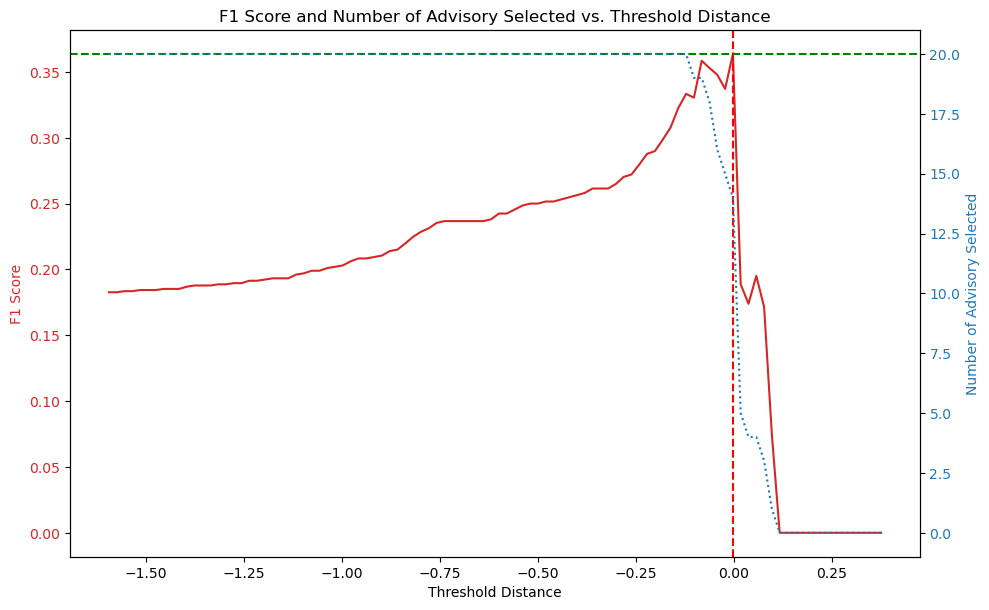

In [55]:
# Visualizing F1 score and the number of 'Advisory' instances selected vs. threshold distance
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Threshold Distance')
ax1.set_ylabel('F1 Score', color=color)
ax1.plot(thresholds, f1_scores, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.axvline(x=best_threshold_f1, color='r', linestyle='--', label="Best Threshold")
ax1.axhline(y=best_f1, color='g', linestyle='--', label="Best F1 Score")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Number of Advisory Selected', color=color)
ax2.plot(thresholds, num_advisory_selected, color=color, linestyle=':')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('F1 Score and Number of Advisory Selected vs. Threshold Distance')
plt.show()

In [56]:
print(best_threshold_f1, best_f1)
data['Close_To_SVM_Cutoff'] = data['svm_decision_functions'] >= best_threshold_f1
data['Close_To_SVM_Cutoff'].value_counts()



-0.0029282807779673625 0.36363636363636365


Close_To_SVM_Cutoff
False    143
True      57
Name: count, dtype: int64

In [57]:
data[data['Label'] == 'Advisory']['Kmeans_Advisory'].mean()

0.45

In [58]:
data[data['Label'] == 'Advisory']['Isolation_Forest_Advisory'].mean()

0.75

In [59]:
data[data['Label'] == 'Advisory']['Close_To_SVM_Cutoff'].mean()

0.7

### Emsembled Isolation Forest Model (uses the distances created by the previous models)

In [60]:
features = ['svm_decision_functions', 'Anomaly_Score' ,'kmeans_distances'] + ['Age', 'Income', 'Job Type_Chief Officer', 'Job Type_Owner',
            'Job Type_VP', 'Tax Classification_High', 'Tax Classification_Low',
            'Tax Classification_Medium']
X = data[features]

In [61]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [62]:
# Fitting KMeans to the 'Advisory' class only
advisory_indices = data[data['Label'] == 'Advisory'].index

In [63]:
# Training the Isolation Forest model on 'Advisory' labeled rows
iso_forest_model = IsolationForest(n_estimators=100, random_state=42, contamination='auto')
iso_forest_model.fit(X_scaled[advisory_indices])

IsolationForest(random_state=42)

In [64]:
# Scoring the entire dataset
data['Anomaly_Score_Ensembled'] = iso_forest_model.decision_function(X_scaled)

In [65]:
# Setting a threshold for being similar to the 'Advisory' cluster - using the median distance of 'Advisory' instances
threshold_distance = np.median(data['Anomaly_Score_Ensembled'][advisory_indices])


In [66]:
# Flagging instances closer to the cluster center than the threshold as potential 'Advisory'
data['Isolation_Forest_Advisory_Ensembled'] = data['Anomaly_Score_Ensembled'] > threshold_distance

In [67]:
# Summarizing the potential 'Advisory' instances among the 'Unknown' labels based on distance
potential_advisory_by_distance_summary = data[data['Label'] == 'Unknown']['Closer_To_Advisory_Normality'].value_counts()
print('initial threshold: ', threshold_distance)
print('potential_advisory_by_distance_summary:')
print(potential_advisory_by_distance_summary)

initial threshold:  -0.007926358266575062
potential_advisory_by_distance_summary:
Closer_To_Advisory_Normality
False    145
True      35
Name: count, dtype: int64


In [68]:
# Calculating the F1 score for the initial threshold
initial_f1_score = f1_score(data['Label'] == 'Advisory', data['Closer_To_Advisory_Normality'])

In [69]:
# Exploring different thresholds to optimize the F1 score
thresholds = np.linspace(data['Anomaly_Score_Ensembled'].min(), data['Anomaly_Score_Ensembled'].max(), 100)
f1_scores = []
num_advisory_selected = []

for thresh in thresholds:
    predicted_advisory = data['Anomaly_Score_Ensembled'] > thresh
    f1_scores.append(f1_score(data['Label'] == 'Advisory', predicted_advisory))
    num_advisory_selected.append(((data['Label'] == 'Advisory') & predicted_advisory).sum())

In [70]:
# Finding the threshold with the highest F1 score
max_f1_index = np.argmax(f1_scores)
best_threshold_f1 = thresholds[max_f1_index]
best_f1 = f1_scores[max_f1_index]

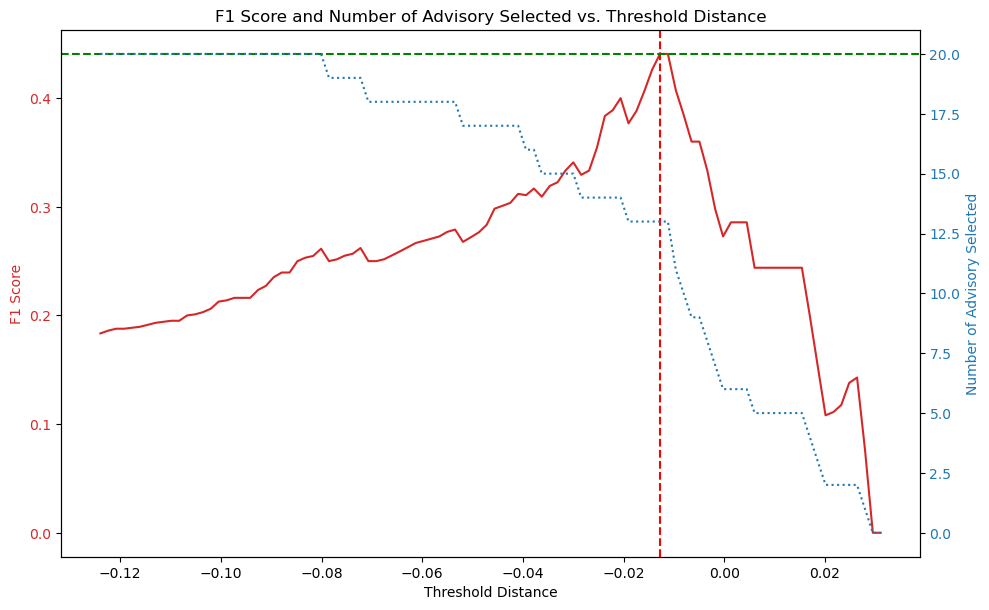

In [71]:
# Visualizing F1 score and the number of 'Advisory' instances selected vs. threshold distance
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Threshold Distance')
ax1.set_ylabel('F1 Score', color=color)
ax1.plot(thresholds, f1_scores, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.axvline(x=best_threshold_f1, color='r', linestyle='--', label="Best Threshold")
ax1.axhline(y=best_f1, color='g', linestyle='--', label="Best F1 Score")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Number of Advisory Selected', color=color)
ax2.plot(thresholds, num_advisory_selected, color=color, linestyle=':')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('F1 Score and Number of Advisory Selected vs. Threshold Distance')
plt.show()

In [72]:
best_threshold_f1, best_f1
print('best_threshold_f1: ', best_threshold_f1)
data['Isolation_Forest_Advisory_Ensembled'] = data['Anomaly_Score_Ensembled'] > best_threshold_f1
data['Isolation_Forest_Advisory_Ensembled'].value_counts()

best_threshold_f1:  -0.012756767467078572


Isolation_Forest_Advisory_Ensembled
False    161
True      39
Name: count, dtype: int64

In [73]:
data['predicted_label'] = data['Isolation_Forest_Advisory_Ensembled'] * 1

In [75]:
from sklearn.metrics import f1_score
data['Label_dummy'] = data['Label'].apply(lambda x: 1 if x == 'Advisory' else 0)
f1_score(data[data['predicted_label'] == 1]['Label_dummy'], data[data['predicted_label'] == 1]['predicted_label'])

0.5

In [76]:
data.loc[data['Label'] == 'Advisory', 'predicted_label'] = 1

In [77]:
data['predicted_label'] = data['predicted_label'].fillna(0)

## Approach 2: Kmeans Clustering and Picking Clusters with the Highest Density
This approach iteractively creates kmeans clusters for each category of job type and then calculates the 'advisory'  density. 
Then I choose the cluster option that gives me the highest density of adviors in it. 


In [78]:
data['Label_dummy'] = data['Label'].apply(lambda x: 1 if x == 'Advisory' else 0)
#dummies = pd.get_dummies(data[['Job Type', 'Tax Classification']], drop_first=False)
#data = pd.concat([data, dummies], axis=1)
data[data['Label'] == 'Advisory'][['Job Type', 'Tax Classification']].value_counts().sort_index()

Job Type       Tax Classification
Chief Officer  High                  1
               Low                   2
               Medium                5
Owner          High                  2
               Low                   2
               Medium                3
VP             High                  2
               Medium                3
Name: count, dtype: int64

In [204]:
cols = ['Age', 'Income']

mask = data['Job Type'] == 'VP'
name = 'VP'

In [205]:
scaler = StandardScaler()
X = scaler.fit_transform(data[mask][cols])

In [206]:
kmeans_stats_all = pd.DataFrame()
for n in range(2,8):

    kmeans = KMeans(n_clusters=n, random_state=0, n_init="auto").fit(X)
    data.loc[mask, f'{name}_kmeans.n_clusters:{n}'] = kmeans.labels_
    kmeans_stats = data.groupby(f'{name}_kmeans.n_clusters:{n}')['Label_dummy'].agg(['count', 'sum', 'mean'])
    kmeans_stats['label'] = f'{name}_kmeans.n_clusters:{n}'
    kmeans_stats_all = pd.concat([kmeans_stats_all, kmeans_stats],axis=0)
kmeans_stats_all['advisory_sum_at_job_level'] = kmeans_stats_all.groupby('label')['sum'].transform('sum')
kmeans_stats_all['density'] = kmeans_stats_all['sum'] / kmeans_stats_all['advisory_sum_at_job_level'] / kmeans_stats_all['count']
kmeans_stats_all = kmeans_stats_all.sort_values(['density', 'sum','label'], ascending=[False, False, True])
kmeans_stats_all = kmeans_stats_all.reset_index().rename(columns={'index': 'cluster_name'})
kmeans_stats_all
#VP_kmeans.labels_5, 0



,cluster_name,count,sum,mean,label,advisory_sum_at_job_level,density
0,0.0,15,5,0.333333,VP_kmeans.n_clusters:5,5,0.066667
1,5.0,3,1,0.333333,VP_kmeans.n_clusters:6,5,0.066667
2,5.0,3,1,0.333333,VP_kmeans.n_clusters:7,5,0.066667
3,0.0,13,4,0.307692,VP_kmeans.n_clusters:6,5,0.061538
4,0.0,13,4,0.307692,VP_kmeans.n_clusters:7,5,0.061538
5,0.0,20,5,0.250000,VP_kmeans.n_clusters:4,5,0.050000
6,0.0,22,5,0.227273,VP_kmeans.n_clusters:3,5,0.045455
7,0.0,24,5,0.208333,VP_kmeans.n_clusters:2,5,0.041667
8,1.0,26,0,0.000000,VP_kmeans.n_clusters:2,5,0.000000
9,1.0,14,0,0.000000,VP_kmeans.n_clusters:3,5,0.000000


In [207]:
VP_best_cluster = {}
VP_best_cluster['best_cluster_iteration'] = kmeans_stats_all.loc[0]['label']
VP_best_cluster['best_cluster_name'] = kmeans_stats_all.loc[0]['cluster_name']
VP_best_cluster

{'best_cluster_iteration': 'VP_kmeans.n_clusters:5', 'best_cluster_name': 0.0}

In [208]:
# best cluster for VP
data[data[VP_best_cluster['best_cluster_iteration']] == VP_best_cluster['best_cluster_name']][['ID', 'Label', 'Age', 'Income', 'Job Type', 'Tax Classification']] #15,5,5


,ID,Label,Age,Income,Job Type,Tax Classification
1,2,Advisory,24.0,295000.0,VP,High
9,10,Unknown,35.0,352000.0,VP,Low
15,16,Unknown,27.0,325000.0,VP,High
37,38,Unknown,29.0,343000.0,VP,High
89,90,Unknown,27.0,327000.0,VP,High
101,102,Advisory,27.0,337000.0,VP,Medium
111,112,Advisory,27.0,286000.0,VP,Medium
117,118,Unknown,25.0,280000.0,VP,Low
127,128,Unknown,27.0,294000.0,VP,Low
129,130,Unknown,29.0,300000.0,VP,Low


In [209]:
mask = data['Job Type'] == 'Chief Officer'
name = 'CO'
cols = ['Age', 'Income', 'Tax Classification_High', 'Tax Classification_Low',
       'Tax Classification_Medium']

In [210]:
scaler = StandardScaler()
X = scaler.fit_transform(data[mask][cols])

In [211]:
kmeans_stats_all = pd.DataFrame()
for n in range(2,8):

    kmeans = KMeans(n_clusters=n, random_state=0, n_init="auto").fit(X)
    data.loc[mask, f'{name}_kmeans.n_clusters:{n}'] = kmeans.labels_
    kmeans_stats = data.groupby(f'{name}_kmeans.n_clusters:{n}')['Label_dummy'].agg(['count', 'sum', 'mean'])
    kmeans_stats['label'] = f'{name}_kmeans.n_clusters:{n}'
    kmeans_stats_all = pd.concat([kmeans_stats_all, kmeans_stats],axis=0)
kmeans_stats_all['advisory_sum_at_job_level'] = kmeans_stats_all.groupby('label')['sum'].transform('sum')
kmeans_stats_all['density'] = kmeans_stats_all['sum'] / kmeans_stats_all['advisory_sum_at_job_level'] / kmeans_stats_all['count']
kmeans_stats_all = kmeans_stats_all.sort_values(['density', 'sum','label'], ascending=[False, False, True])
kmeans_stats_all = kmeans_stats_all.reset_index().rename(columns={'index': 'cluster_name'})
kmeans_stats_all
#CO_kmeans.labels_5, 3

,cluster_name,count,sum,mean,label,advisory_sum_at_job_level,density
0,3.0,23,5,0.217391,CO_kmeans.n_clusters:5,8,0.027174
1,3.0,23,5,0.217391,CO_kmeans.n_clusters:6,8,0.027174
2,3.0,23,5,0.217391,CO_kmeans.n_clusters:7,8,0.027174
3,3.0,35,5,0.142857,CO_kmeans.n_clusters:4,8,0.017857
4,1.0,64,7,0.109375,CO_kmeans.n_clusters:2,8,0.013672
5,1.0,64,7,0.109375,CO_kmeans.n_clusters:3,8,0.013672
6,5.0,12,1,0.083333,CO_kmeans.n_clusters:6,8,0.010417
7,5.0,12,1,0.083333,CO_kmeans.n_clusters:7,8,0.010417
8,6.0,12,1,0.083333,CO_kmeans.n_clusters:7,8,0.010417
9,1.0,29,2,0.068966,CO_kmeans.n_clusters:4,8,0.008621


In [212]:
CO_best_cluster = {}
CO_best_cluster['best_cluster_iteration'] = kmeans_stats_all.loc[0]['label']
CO_best_cluster['best_cluster_name'] = kmeans_stats_all.loc[0]['cluster_name']
CO_best_cluster

{'best_cluster_iteration': 'CO_kmeans.n_clusters:5', 'best_cluster_name': 3.0}

In [213]:
# best cluster for CO
data[data[CO_best_cluster['best_cluster_iteration']] == CO_best_cluster['best_cluster_name']][['ID', 'Label', 'Age', 'Income', 'Job Type', 'Tax Classification']] #22,5,8


,ID,Label,Age,Income,Job Type,Tax Classification
3,4,Unknown,50.0,565000.0,Chief Officer,Medium
11,12,Advisory,45.0,541000.0,Chief Officer,Medium
31,32,Advisory,52.0,581000.0,Chief Officer,Medium
35,36,Unknown,44.0,520000.0,Chief Officer,Medium
39,40,Unknown,46.0,523000.0,Chief Officer,Medium
41,42,Advisory,50.0,586000.0,Chief Officer,Medium
49,50,Unknown,42.0,484000.0,Chief Officer,Medium
51,52,Advisory,45.0,528000.0,Chief Officer,Medium
57,58,Unknown,42.0,503000.0,Chief Officer,Medium
62,63,Unknown,46.0,526000.0,Chief Officer,Medium


In [214]:
mask = data['Job Type'] == 'Owner'
name = 'OW'

cols = ['Age', 'Income',]

In [215]:
scaler = StandardScaler()
X = scaler.fit_transform(data[mask][cols])

In [216]:
kmeans_stats_all = pd.DataFrame()
for n in range(2,8):

    kmeans = KMeans(n_clusters=n, random_state=0, n_init="auto").fit(X)
    data.loc[mask, f'{name}_kmeans.n_clusters:{n}'] = kmeans.labels_
    kmeans_stats = data.groupby(f'{name}_kmeans.n_clusters:{n}')['Label_dummy'].agg(['count', 'sum', 'mean'])
    kmeans_stats['label'] = f'{name}_kmeans.n_clusters:{n}'
    kmeans_stats_all = pd.concat([kmeans_stats_all, kmeans_stats],axis=0)
kmeans_stats_all['advisory_sum_at_job_level'] = kmeans_stats_all.groupby('label')['sum'].transform('sum')
kmeans_stats_all['density'] = kmeans_stats_all['sum'] / kmeans_stats_all['advisory_sum_at_job_level'] / kmeans_stats_all['count']
kmeans_stats_all = kmeans_stats_all.sort_values(['density', 'sum', 'label'], ascending=[False, False, True])
kmeans_stats_all = kmeans_stats_all.reset_index().rename(columns={'index': 'cluster_name'})
kmeans_stats_all
#CO_kmeans.labels_5, 2

,cluster_name,count,sum,mean,label,advisory_sum_at_job_level,density
0,2.0,14,4,0.285714,OW_kmeans.n_clusters:4,7,0.040816
1,2.0,20,5,0.250000,OW_kmeans.n_clusters:5,7,0.035714
2,2.0,20,5,0.250000,OW_kmeans.n_clusters:6,7,0.035714
3,6.0,4,1,0.250000,OW_kmeans.n_clusters:7,7,0.035714
4,2.0,18,4,0.222222,OW_kmeans.n_clusters:7,7,0.031746
5,0.0,22,4,0.181818,OW_kmeans.n_clusters:3,7,0.025974
6,0.0,33,5,0.151515,OW_kmeans.n_clusters:2,7,0.021645
7,2.0,14,2,0.142857,OW_kmeans.n_clusters:3,7,0.020408
8,3.0,8,1,0.125000,OW_kmeans.n_clusters:4,7,0.017857
9,3.0,10,1,0.100000,OW_kmeans.n_clusters:7,7,0.014286


In [217]:
OW_best_cluster = {}
OW_best_cluster['best_cluster_iteration'] = kmeans_stats_all.loc[0]['label']
OW_best_cluster['best_cluster_name'] = kmeans_stats_all.loc[0]['cluster_name']
OW_best_cluster

{'best_cluster_iteration': 'OW_kmeans.n_clusters:4', 'best_cluster_name': 2.0}

In [218]:
# best cluster for OW
data[data[OW_best_cluster['best_cluster_iteration']] == OW_best_cluster['best_cluster_name']][['ID', 'Label', 'Age', 'Income', 'Job Type', 'Tax Classification']] #14,4,7


,ID,Label,Age,Income,Job Type,Tax Classification
21,22,Advisory,55.0,646000.0,Owner,Low
27,28,Unknown,55.0,643000.0,Owner,Low
33,34,Unknown,55.0,627000.0,Owner,Low
61,62,Advisory,57.0,657000.0,Owner,Low
93,94,Unknown,57.0,698000.0,Owner,High
138,139,Unknown,50.0,629000.0,Owner,High
139,140,Unknown,55.0,625000.0,Owner,Low
145,146,Unknown,59.0,667000.0,Owner,Low
159,160,Unknown,61.0,679000.0,Owner,Low
165,166,Unknown,57.0,664000.0,Owner,Medium


In [219]:
VP_best_cluster

{'best_cluster_iteration': 'VP_kmeans.n_clusters:5', 'best_cluster_name': 0.0}

In [220]:
CO_best_cluster

{'best_cluster_iteration': 'CO_kmeans.n_clusters:5', 'best_cluster_name': 3.0}

In [221]:
OW_best_cluster

{'best_cluster_iteration': 'OW_kmeans.n_clusters:4', 'best_cluster_name': 2.0}

In [226]:
mask = (
        (data[VP_best_cluster['best_cluster_iteration']] == VP_best_cluster['best_cluster_name']) | 
        (data[CO_best_cluster['best_cluster_iteration']] == CO_best_cluster['best_cluster_name']) | 
        (data[OW_best_cluster['best_cluster_iteration']] == OW_best_cluster['best_cluster_name']) 
       )
#AKA:

#mask = (data['VP_kmeans.labels_5'] == 0) | (data['CO_kmeans.labels_5'] == 3) | (data['OW_kmeans.labels_4'] == 2)


In [230]:
#AKA:

#mask = (data['VP_kmeans.labels_5'] == 0) | (data['CO_kmeans.labels_5'] == 3) | (data['OW_kmeans.labels_4'] == 2)
data.loc[mask, 'predicted_label_alternative'] = 1

In [231]:
from sklearn.metrics import f1_score
f1_score(data[data['predicted_label_alternative'] == 1]['Label_dummy'], data[data['predicted_label_alternative'] == 1]['predicted_label_alternative'])

0.42424242424242425

In [95]:
data.loc[data['Label'] == 'Advisory', 'predicted_label_alternative'] = 1

In [96]:
data['predicted_label_alternative'] = data['predicted_label_alternative'].fillna(0)

In [97]:
data[['ID', 'predicted_label','predicted_label_alternative']].to_csv('NurgulBaktirSubmission.csv', index=False)